Preliminaries
=========

In [2]:
%matplotlib inline

import pprint
import sqlite3
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import sys
from datascience import *
import matplotlib.dates as mdates

Load the database, store in cursor

In [3]:
# connection = sqlite3.connect('test5.db')
# cursor = connection.cursor()
# print('Opened database successfully')
#NOTE: Will change the implementation to a database per table.

#### Some Helper Functions:


In [4]:

def avg_num_comments(submission_table):
    connection = sqlite3.connect(submission_table + '.db')
    cursor = connection.cursor()
    total_num_comments = cursor.execute('select sum(num_comments) from {}'.format(submission_table +'_submission_data')).fetchone()[0]
    num_submissions = cursor.execute('select count(id) from {}'.format(submission_table)).fetchone()[0]
    connection.close()
    return total_num_comments / num_submissions

def max_num_comments(submission_table):
    connection = sqlite3.connect(submission_table + '.db')
    cursor = connection.cursor()
    max_comments = cursor.execute('select max(num_comments) from {}'.format(submission_table + '_submission_data')).fetchone()[0]
    connection.close()
    return max_comments

def median_num_comments(submission_table):
    return

def avg_comment_text_chars(comment_table_name):
    connection = sqlite3.connect(comment_table_name+ '.db')
    cursor = connection.cursor()
    sum_len = 0
    comments = cursor.execute('SELECT self_text FROM {}'.format(comment_table_name +'_comment_data')).fetchall()
    comment_count = cursor.execute('SELECT count(id) FROM {}'.format(comment_table_name + '_comment_data')).fetchall()
    for comment in comments:
        sum_len += len(comment)
    connection.close()
    return sum_len/comment_count
    
def get_avg_row_bytes(table):
    byte_count = 0
    connection = sqlite3.connect(table +'.db')
    cursor = connection.cursor()
    rows = cursor.execute('SELECT * FROM {}'.format(table)).fetchall()
    num_rows = cursor.execute('select count(id) from {}'.format(table)).fetchone()[0]
    for row in rows:
        for item in row:
            byte_count += sys.getsizeof(item)
    connection.close()
    return byte_count / num_rows

def get_total_bytes(table):
    connection = sqlite3.connect(table+'.db')
    cursor = connection.cursor()
    byte_count = 0
    rows = cursor.execute('SELECT * FROM {}'.format(table)).fetchall()
    for row in rows:
        for item in row:
            byte_count += sys.getsizeof(item)
    connection.close()
    return byte_count

def all_submission_num_comments(submission_table):
    return


def get_comment_times(subreddit):
    connection = sqlite3.connect(subreddit+'.db')
    cursor = connection.cursor()
    time_lst = []
    comment_times = cursor.execute('select datetime from {}'.format(subreddit+'_comment_data')).fetchall()
    for comment in comment_times:
        time_lst.append(comment[0])
    connection.close()
    return time_lst

def get_media_counts(subreddits):
    media_table = Table().with_columns(['Name', [], 'Total Submissions',[],
                                        'Text Posts',[], 'Pictures', [], 'Videos', [], 'Articles', []])

    for s in subreddits:
        connection = sqlite3.connect(s+'.db')
        cursor = connection.cursor()
        table_name = s.lower() + '_submission_data'
        total_submissions = cursor.execute('select count(*) from {}'.format(table_name)).fetchone()[0]
        picture_count = cursor.execute('select sum(picture) from {}'.format(table_name)).fetchone()[0]
        video_count = cursor.execute('select sum(video) from {}'.format(table_name)).fetchone()[0]
        article_count = cursor.execute('select sum(article) from {}'.format(table_name)).fetchone()[0]
        text_count = cursor.execute(
            'select count(*) from {} where picture = 0 and video = 0 and article = 0'.format(table_name)).fetchone()[0]
        media_table = media_table.with_row([s, total_submissions, text_count, picture_count, video_count, article_count])
    return media_table
get_comment_times('anxiety')

['2016-04-19 07:16:11',
 '2016-04-19 06:17:21',
 '2016-04-19 04:31:20',
 '2016-04-19 04:35:11',
 '2016-04-19 04:41:25',
 '2016-04-19 04:25:28',
 '2016-04-19 04:34:08',
 '2016-04-19 06:56:30',
 '2016-04-19 04:54:37',
 '2016-04-19 04:50:30',
 '2016-04-19 05:02:02',
 '2016-04-19 06:24:10',
 '2016-04-19 06:46:05',
 '2016-04-19 07:11:43',
 '2016-04-19 07:15:59',
 '2016-04-19 04:40:04',
 '2016-04-20 05:25:56',
 '2016-04-20 05:09:10',
 '2016-04-20 03:20:37',
 '2016-04-20 04:01:03',
 '2016-04-20 03:59:00',
 '2016-04-20 02:31:14',
 '2016-04-20 02:53:39',
 '2016-04-20 08:29:41',
 '2016-04-20 08:35:52',
 '2016-04-20 09:04:15',
 '2016-04-20 09:03:27',
 '2016-04-20 08:43:49',
 '2016-04-20 07:24:18',
 '2016-04-20 07:38:27',
 '2016-04-20 07:49:19',
 '2016-04-20 08:12:52',
 '2016-04-20 08:23:29',
 '2016-04-20 08:35:04',
 '2016-04-20 07:31:45',
 '2016-04-20 08:46:49',
 '2016-04-20 08:47:48',
 '2016-04-20 02:11:44',
 '2016-04-20 03:29:35',
 '2016-04-20 02:27:16',
 '2016-04-20 04:42:45',
 '2016-04-20 06:

Exploration
========

Test Plot for Reference
--------------------------------------

In [5]:
subreddit_names = ['SFTS', 'anxiety', 'bipolar',
                 'depression', 'gaming',
                 'mentalhealth','needadvice',
                 'offmychest']
submission_data = ('SFTS_submission_data', 'anxiety_submission_data', 'bipolar_submission_data',
               'depression_submission_data', 'gaming_submission_data', 'mentalhealth_submission_data',
               'needadvice_submission_data', 'offmychest_submission_data')
num_submissions = []
for name in subreddit_names:
    submission_count = cursor.execute("SELECT COUNT(ID) FROM {} where type = 'S';".format(name)).fetchone()
    num_submissions.append(submission_count[0])

#plotting
fig, ax = plt.subplots()
ax.bar(np.arange(len(subreddit_names)), num_submissions, align='center') #, tick_label = subreddit_names)
ax.set_ylabel(' # submissions', fontsize=20)
plt.title('Number of Submissions per Subreddit', fontsize=20)
ax.set_xticks(np.arange(len(subreddit_names)))
ax.set_xticklabels(subreddit_names, rotation=45, fontsize=20)
plt.show()

NameError: name 'cursor' is not defined

## Preliminary Submission Data

Subreddit,Average Comment Per Submission,Max Comments In a Submission,Average Bytes per Submission,Total Bytes
SFTS,0.353591,10,258.088,46714
anxiety,0.83342,106,281.377,1628330
bipolar,0.905753,107,284.35,2664073
depression,0.812011,150,279.385,1321212
gaming,1.2785,2937,285.459,2564566
mentalhealth,0.748742,30,277.015,936032
needadvice,0.855197,34,282.065,393481
offmychest,0.891808,289,277.092,1075671


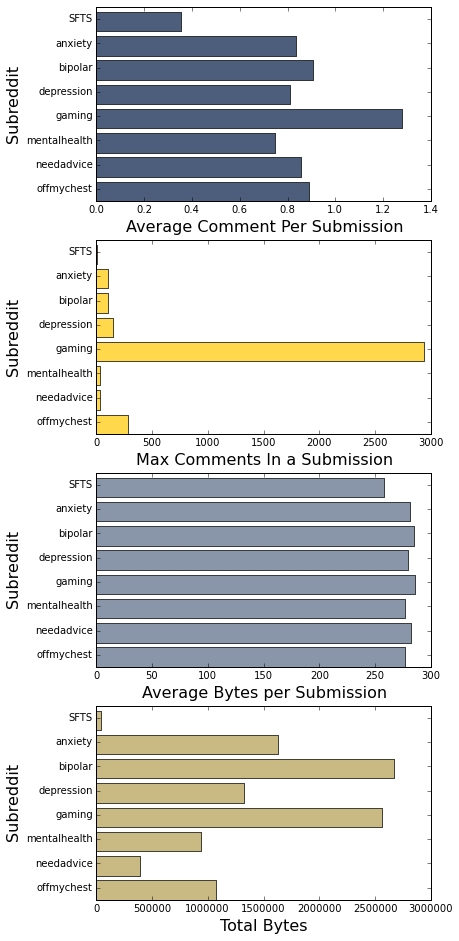

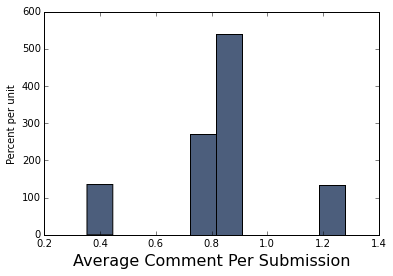

In [6]:
subreddit_names = ['SFTS', 'anxiety', 'bipolar',
                 'depression', 'gaming',
                 'mentalhealth','needadvice',
                 'offmychest']
submission_data = ('SFTS_submission_data', 'anxiety_submission_data', 'bipolar_submission_data',
               'depression_submission_data', 'gaming_submission_data', 'mentalhealth_submission_data',
               'needadvice_submission_data', 'offmychest_submission_data')
avg_num_comment_lst = []
max_num_comment_lst = []
total_bytes_lst = []
avg_bytes_per_submission_lst = []
for subreddit in subreddit_names:
    avg_num = avg_num_comments(subreddit)
    max_comments = max_num_comments(subreddit)
    total_bytes = get_total_bytes(subreddit)
    avg_bytes = get_avg_row_bytes(subreddit)
    max_num_comment_lst += [max_comments]
    avg_num_comment_lst += [avg_num]
    total_bytes_lst += [total_bytes]
    avg_bytes_per_submission_lst += [avg_bytes]
avg_num_comment_lst
x = Table().with_columns(
          ['Subreddit', subreddit_names, 'Average Comment Per Submission',avg_num_comment_lst,
                    'Max Comments In a Submission', max_num_comment_lst, 'Average Bytes per Submission',
                    avg_bytes_per_submission_lst, 'Total Bytes', total_bytes_lst])

# fig, ax = plt.subplots()
# ax.bar(np.arange(len(subreddit_names)), num_threads, align='center') #, tick_label = subreddit_names)
# ax.set_ylabel(' # submissions', fontsize=20)
# plt.title('Number of Submissions per Subreddit', fontsize=20)
# ax.set_xticks(np.arange(len(subreddit_names)))
# ax.set_xticklabels(subreddit_names, rotation=45, fontsize=20)
# plt.show()
#x
x.barh(column_for_categories='Subreddit', overlay = False)
x.select(['Average Comment Per Submission']).hist()
#x.barh('Subreddit', 'Max Comments in a Submission')
x

## Comments

In [12]:
# all_dates = []
# for subreddit in subreddit_names:
#     data = get_comment_times(subreddit)
#     all_dates += [mdate.strpdate2num(date) for date in data]
media_table = get_media_counts(subreddit_names)
# # plot it
# fig, ax = plt.subplots(1,1)
# ax.hist(mpl_data, bins=50, color='lightblue')
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
# plt.show()
media_table

Name,Total Submissions,Text Posts,Pictures,Videos,Articles
SFTS,114,20,8,11,75
anxiety,979,919,8,12,40
bipolar,1007,941,25,8,33
depression,1000,1000,0,0,0
gaming,772,210,220,137,205
mentalhealth,886,643,9,20,214
needadvice,214,214,0,0,0
offmychest,1004,1004,0,0,0


In [13]:
media_types = ['Text Posts', 'Pictures', 'Videos', 'Articles']
matrix = media_table.select(media_types).to_df().values.astype(float)
tots = media_table['Total Submissions'].astype(float)

In [14]:
matrix_norm = np.NaN * np.zeros(matrix.shape)

for i in range(matrix.shape[0]):
    matrix_norm[i,:] = 100.0*matrix[i,:]/ tots[i]

In [15]:
matrix_norm

array([[  17.54385965,    7.01754386,    9.64912281,   65.78947368],
       [  93.87129724,    0.81716037,    1.22574055,    4.08580184],
       [  93.44587885,    2.48262165,    0.79443893,    3.27706058],
       [ 100.        ,    0.        ,    0.        ,    0.        ],
       [  27.20207254,   28.49740933,   17.74611399,   26.55440415],
       [  72.57336343,    1.01580135,    2.25733634,   24.15349887],
       [ 100.        ,    0.        ,    0.        ,    0.        ],
       [ 100.        ,    0.        ,    0.        ,    0.        ]])

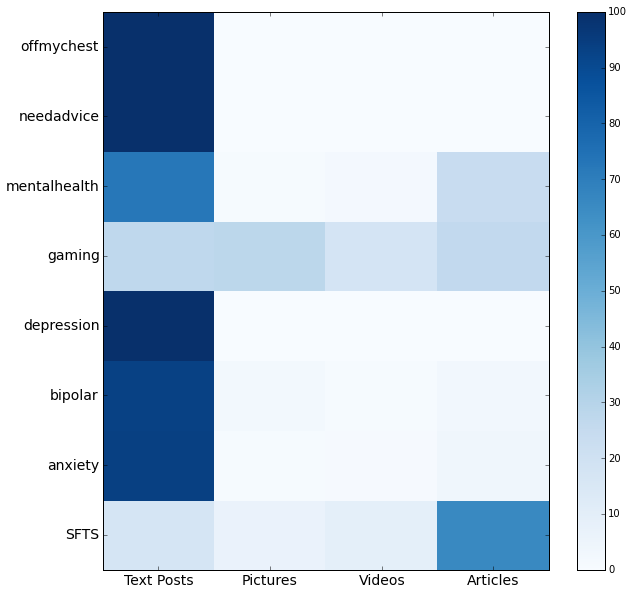

In [16]:
fig, ax = plt.subplots(figsize=(10,10))

plt.pcolor(matrix_norm, cmap='Blues', vmax=100, vmin=0)
plt.colorbar()
plt.xticks(np.arange(len(media_types))+.5, media_types, fontsize=14)
plt.yticks(np.arange(media_table['Name'].shape[0])+.5,media_table['Name'], fontsize=14)
plt.savefig('filename')
plt.show()

#Change Articles to Link, Text posts to something shorter

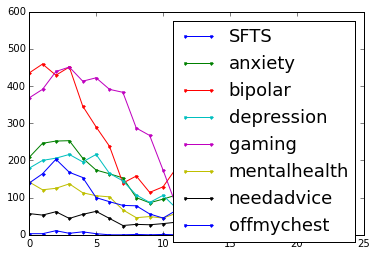

In [25]:
for subreddit in subreddit_names:
    times = get_comment_times(subreddit)
    hours = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S').hour for t in times]
    for (subreddit_times, subredditname) in [(times, subreddit), ]:
        counts, bins = np.histogram(hours, bins = np.arange(25))
        plt.plot(counts, '.-', label=subredditname)
fig, ax = plt.subplots()
fig = 
plt.legend(fontsize=18, labels = subreddit_names)
plt.show()

In [ ]:
D.hour + D.day * 24